<a href="https://colab.research.google.com/github/Mani9006/Strategic-Sales-Performance-and-Customer-Analytics-Framework/blob/main/Final_Sales_Performance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Strategic Sales Performance and Customer Analytics Framework

This project analyzes sales performance and customer trends using Python. It involves filtering significant records, performing data transformations, and visualizing key metrics to extract actionable insights.

In [3]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the dataset containing transactional records
data_path = 'Final_Sales_Performance_Data.csv'
df = pd.read_csv(data_path)
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
   SalesID Region ProductCategory  CustomerID  SalesAmount  \
0        1   East            Food        3293      3830.27   
1        2  North     Electronics        1612      3997.44   
2        3   East     Electronics        7527      2305.25   
3        4  North        Clothing        4736      4142.95   
4        5  North            Food        8624       264.23   

   SatisfactionRating            SalesDate  DiscountApplied  QuantitySold  \
0                   1  2021-01-01 00:00:00               10             2   
1                   1  2021-01-01 01:00:00                5            14   
2                   4  2021-01-01 02:00:00                5            12   
3                   1  2021-01-01 03:00:00                0            10   
4                   3  2021-01-01 04:00:00                5            19   

  RepeatCustomer  
0             No  
1            Yes  
2             No  
3            Yes  
4            Yes  


## Data Cleaning and Transformation

In [5]:
# Filtering data to retain significant sales and non-zero quantities sold
cleaned_data = df[(df['SalesAmount'] > 100) & (df['QuantitySold'] > 1)]
print(f"Cleaned Dataset: {cleaned_data.shape[0]} records remaining after filtering.")
print(cleaned_data.head())

Cleaned Dataset: 18748 records remaining after filtering.
   SalesID Region ProductCategory  CustomerID  SalesAmount  \
0        1   East            Food        3293      3830.27   
1        2  North     Electronics        1612      3997.44   
2        3   East     Electronics        7527      2305.25   
3        4  North        Clothing        4736      4142.95   
4        5  North            Food        8624       264.23   

   SatisfactionRating            SalesDate  DiscountApplied  QuantitySold  \
0                   1  2021-01-01 00:00:00               10             2   
1                   1  2021-01-01 01:00:00                5            14   
2                   4  2021-01-01 02:00:00                5            12   
3                   1  2021-01-01 03:00:00                0            10   
4                   3  2021-01-01 04:00:00                5            19   

  RepeatCustomer  
0             No  
1            Yes  
2             No  
3            Yes  
4          

## Visualization: Monthly Sales Trends by Region

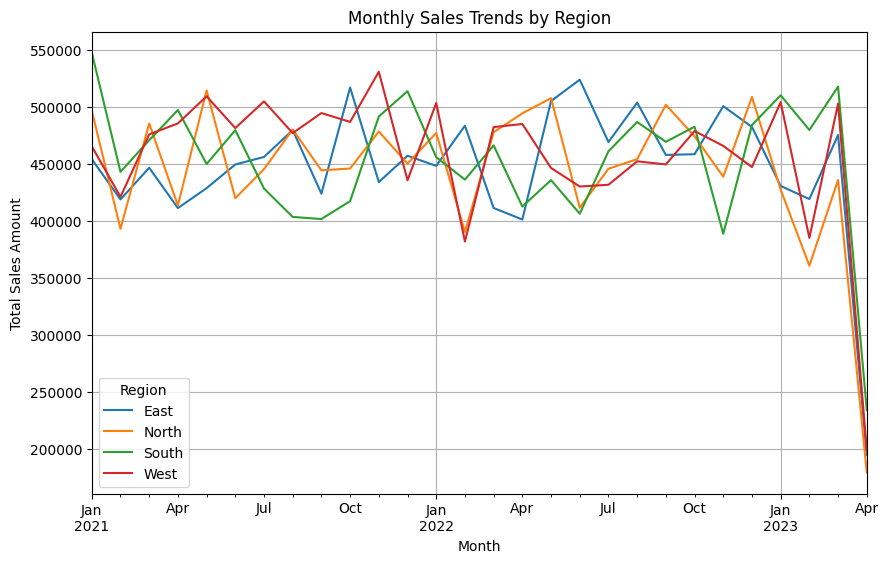

In [6]:
# Analyzing monthly sales trends across regions
df['SalesDate'] = pd.to_datetime(df['SalesDate'])  # Converting sales date to datetime format
monthly_sales = df.groupby([df['SalesDate'].dt.to_period('M'), 'Region'])['SalesAmount'].sum().unstack()
monthly_sales.plot(figsize=(10, 6), kind='line', title='Monthly Sales Trends by Region')
plt.ylabel('Total Sales Amount')
plt.xlabel('Month')
plt.legend(title='Region')
plt.grid(True)
plt.show()

## Visualization: Discount Distribution

<ipython-input-7-dc7107b65b71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DiscountApplied', data=cleaned_data, palette='viridis')


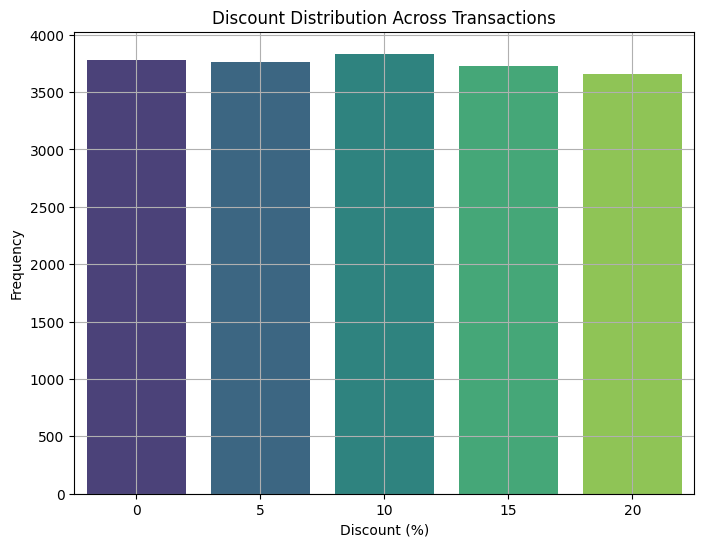

In [7]:
# Visualizing the distribution of discounts applied in transactions
plt.figure(figsize=(8, 6))
sns.countplot(x='DiscountApplied', data=cleaned_data, palette='viridis')
plt.title('Discount Distribution Across Transactions')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Visualization: Satisfaction Ratings by Product Category

<ipython-input-8-94c316f7fb88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ProductCategory', y='SatisfactionRating', data=cleaned_data, palette='muted')


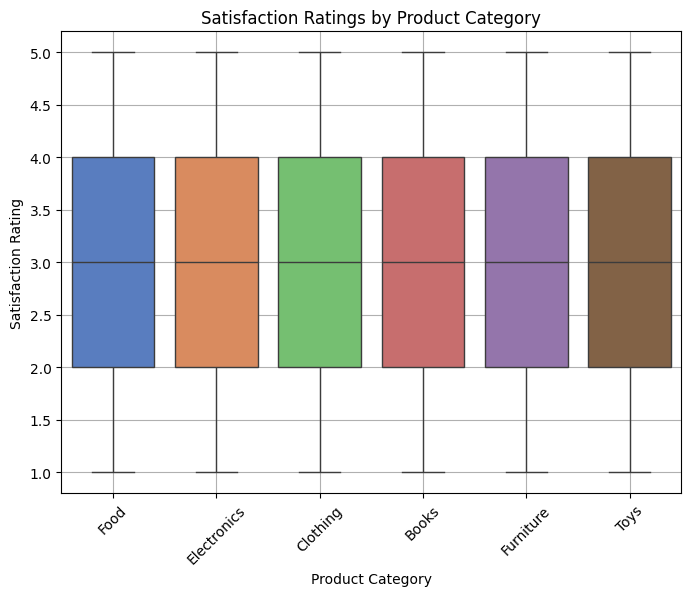

In [8]:
# Exploring customer satisfaction levels across product categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='ProductCategory', y='SatisfactionRating', data=cleaned_data, palette='muted')
plt.title('Satisfaction Ratings by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Satisfaction Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Saving Cleaned Data

In [9]:
# Saving the cleaned dataset for further use
cleaned_data.to_csv('Cleaned_Sales_Performance_Data.csv', index=False)
print("Cleaned data saved as 'Cleaned_Sales_Performance_Data.csv'")

Cleaned data saved as 'Cleaned_Sales_Performance_Data.csv'
